# The Impact of Policies on the Growth Rate of COVID-19 
### Hongyan Meng

### Description
As COVID-19 is spreading throughout the globe, countries took actions to cope with this pandemic. Due to the fact that the stringency of the policies of every country varies, the effect of controlling the COVID-19 is different. This research project focuses on how a country’s reaction and policy decision affect the trend of spreading of COVID-19.


### Datasets
Global COVID-19 daily reports
link :https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

COVID-19 policy tracker
link: https://github.com/OxCGRT/covid-policy-tracker

### Hypothesis
Stringent policies are more effective in controlling the growth rate of COVID-19

### Summary
A cartopy map indicating the current confirmed cases around the globe.

Plot the growth rate curves for every country and examine how the tendency of the curves changes over time.

Determine the policy timelines for different countries and mark them on the growth rate curves to evaluate the effect of such policies


## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

display.set_matplotlib_formats('retina')
%matplotlib inline

In [2]:
# import the data

path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(path,index_col='Country/Region') 
df.head(10)

Province/State       Lat        Long  \
Country/Region                                                            
Afghanistan                                   NaN  33.93911   67.709953   
Albania                                       NaN  41.15330   20.168300   
Algeria                                       NaN  28.03390    1.659600   
Andorra                                       NaN  42.50630    1.521800   
Angola                                        NaN -11.20270   17.873900   
Antigua and Barbuda                           NaN  17.06080  -61.796400   
Argentina                                     NaN -38.41610  -63.616700   
Armenia                                       NaN  40.06910   45.038200   
Australia            Australian Capital Territory -35.47350  149.012400   
Australia                         New South Wales -33.86880  151.209300   

                     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Afghanistan                0        0        0        0        0        0   
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
Argentina                  0        0        0        0        0        0   
Armenia                    0        0        0        0        0        0   
Australia                  0        0        0        0        0        0   
Australia                  0        0        0        0        3        4   

                     1/28/20  ...  11/14/20  11/15/20  11/16/20  11/17/20  \
Country/Region                ...                                           
Afghanistan                0  ...     43035     43240     43403     43628   
Albania                    0  ...     27233     27830     28432     29126   
Algeria                    0  ...     66819     67679     68589     69591   
Andorra                    0  ...      5725      5872      5914      5951   
Angola                     0  ...     13374     13451     13615     13818   
Antigua and Barbuda        0  ...       134       134       134       134   
Argentina                  0  ...   1304846   1310491   1318384   1329005   
Armenia                    0  ...    115855    117337    117886    118870   
Australia                  0  ...       114       114       114       115   
Australia                  4  ...      4486      4498      4502      4509   

                     11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  \
Country/Region                                                          
Afghanistan             43851     44228     44443     44503     44706   
Albania                 29837     30623     31459     32196     32761   
Algeria                 70629     71652     72755     73774     74862   
Andorra                  6018      6066      6142      6207      6256   
Angola                  13922     14134     14267     14413     14493   
Antigua and Barbuda       139       139       139       139       139   
Argentina             1339337   1349434   1359042   1366182   1370366   
Armenia                120459    121979    123646    124839    126224   
Australia                 115       115       115       115       115   
Australia                4514      4517      4527      4538      4542   

                     11/23/20  
Country/Region                 
Afghanistan             44988  
Albania                 33556  
Algeria                 75867  
Andorra                  6304  
Angola                  14634  
Antigua and Barbuda       139  
Argentina             1374631  
Armenia                126709  
Australia                 115  
Australia                4548  

[10 rows x 310 columns

## The Spreading of COVID-19

In [3]:
import cartopy 
import cartopy.crs as ccrs  

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


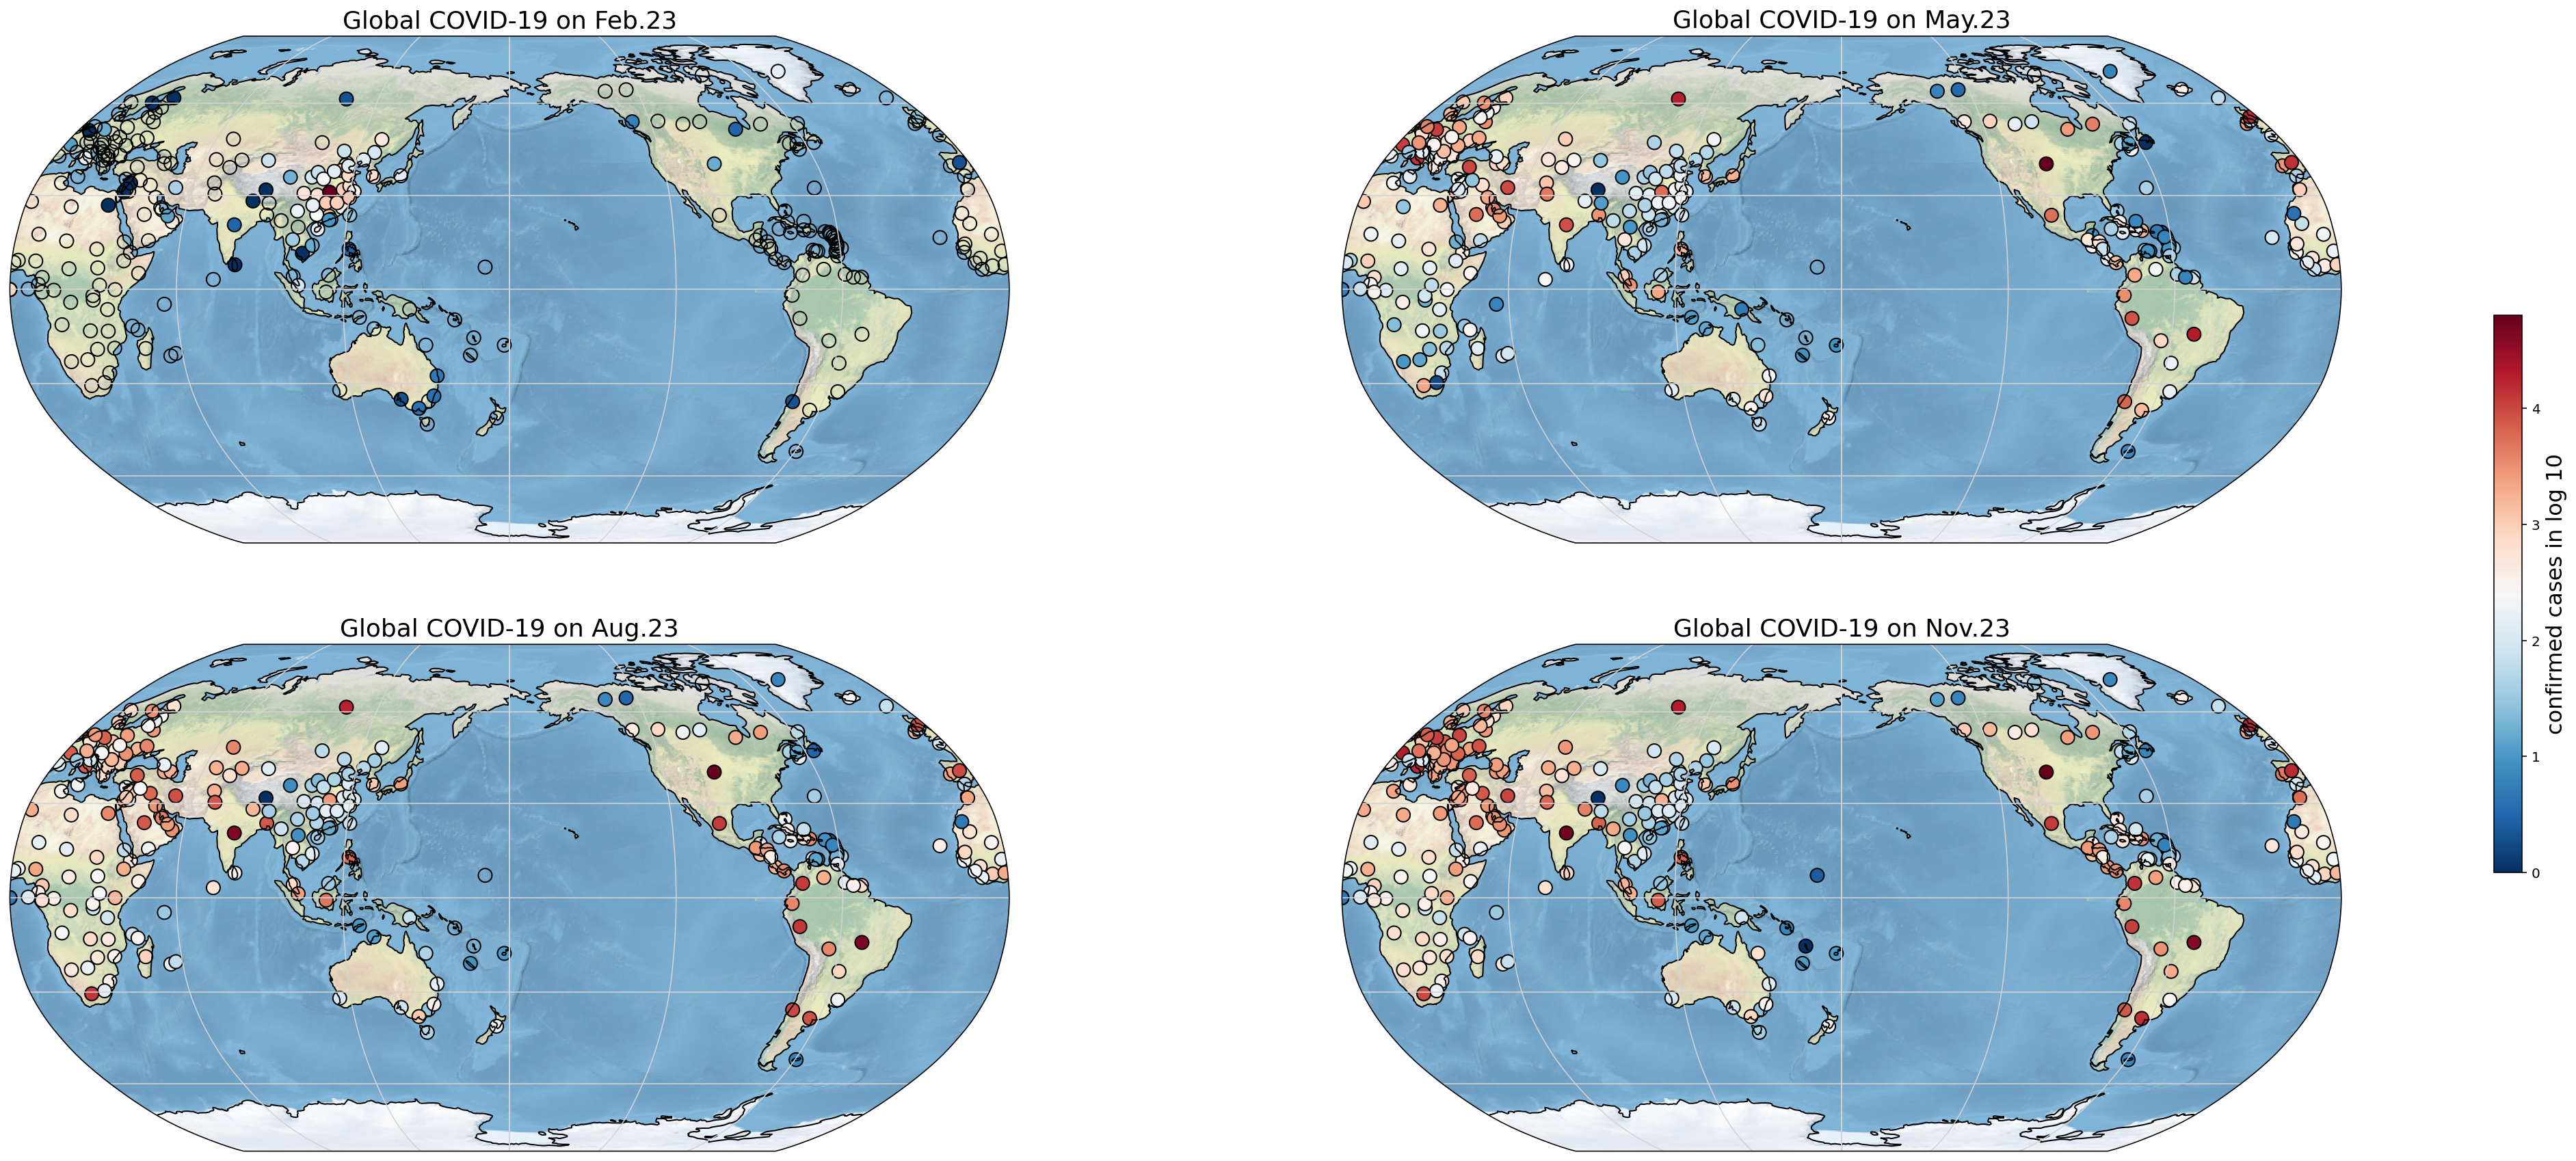

In [4]:
# the spreading of COVID-19 on map (time interval = 3 months)

fig, ax = plt.subplots(ncols=2, nrows =2, subplot_kw={'projection': ccrs.Robinson(central_longitude = 180)}, figsize = (40,15))

ax[0,0].stock_img()
ax[0,0].coastlines(resolution='auto', color='k')
ax[0,0].gridlines(color='lightgrey', linestyle='-',)
ax[0,0].set_title('Global COVID-19 on Feb.23',fontsize=18)
a = ax[0,0].scatter(x = df.Long, y = df.Lat, c = np.log10(df['2/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

ax[0,1].stock_img()
ax[0,1].coastlines(resolution='auto', color='k')
ax[0,1].gridlines(color='lightgrey', linestyle='-',)
ax[0,1].set_title('Global COVID-19 on May.23',fontsize=18)
b = ax[0,1].scatter(x = df.Long, y = df.Lat, c = np.log10(df['5/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())


ax[1,0].stock_img()
ax[1,0].coastlines(resolution='auto', color='k')
ax[1,0].set_title('Global COVID-19 on Aug.23',fontsize=18)
ax[1,0].gridlines(color='lightgrey', linestyle='-',)
c = ax[1,0].scatter(x = df.Long, y = df.Lat, c = np.log10(df['8/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

ax[1,1].stock_img()
ax[1,1].coastlines(resolution='auto', color='k')
ax[1,1].set_title('Global COVID-19 on Nov.23',fontsize=18)
ax[1,1].gridlines(color='lightgrey', linestyle='-',)
d = ax[1,1].scatter(x = df.Long, y = df.Lat, c = np.log10(df['11/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

cbar = plt.colorbar(a, ax=ax, shrink = 0.5)
cbar.set_label('confirmed cases in log 10', fontsize=16)

The spread of the COVID-19 started spreading from Asia to Europe and Americas first, then Africa.

In [99]:
#combine all the data for a country
df_country = df.groupby('Country/Region').sum()
df_country.head(5)

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  11/14/20  11/15/20  \
Country/Region                                      ...                       
Afghanistan           0        0        0        0  ...     43035     43240   
Albania               0        0        0        0  ...     27233     27830   
Algeria               0        0        0        0  ...     66819     67679   
Andorra               0        0        0        0  ...      5725      5872   
Angola                0        0        0        0  ...     13374     13451   

                11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  \
Country/Region                                                               
Afghanistan        43403     43628     43851     44228     44443     44503   
Albania            28432     29126     29837     30623     31459     32196   
Algeria            68589     69591     70629     71652     72755     73774   
Andorra             5914      5951      6018      6066      6142      6207   
Angola             13615     13818     13922     14134     14267     14413   

                11/22/20  11/23/20  
Country/Region                      
Afghanistan        44706     44988  
Albania            32761     33556  
Algeria            74862     75867  
Andorra             6256      6304  
Angola             14493     14634  

[5 rows x 309 columns]

In [71]:
# drop the location data
df_slice = df_country.iloc[:,2:310]

(0.0, 12500000.0)

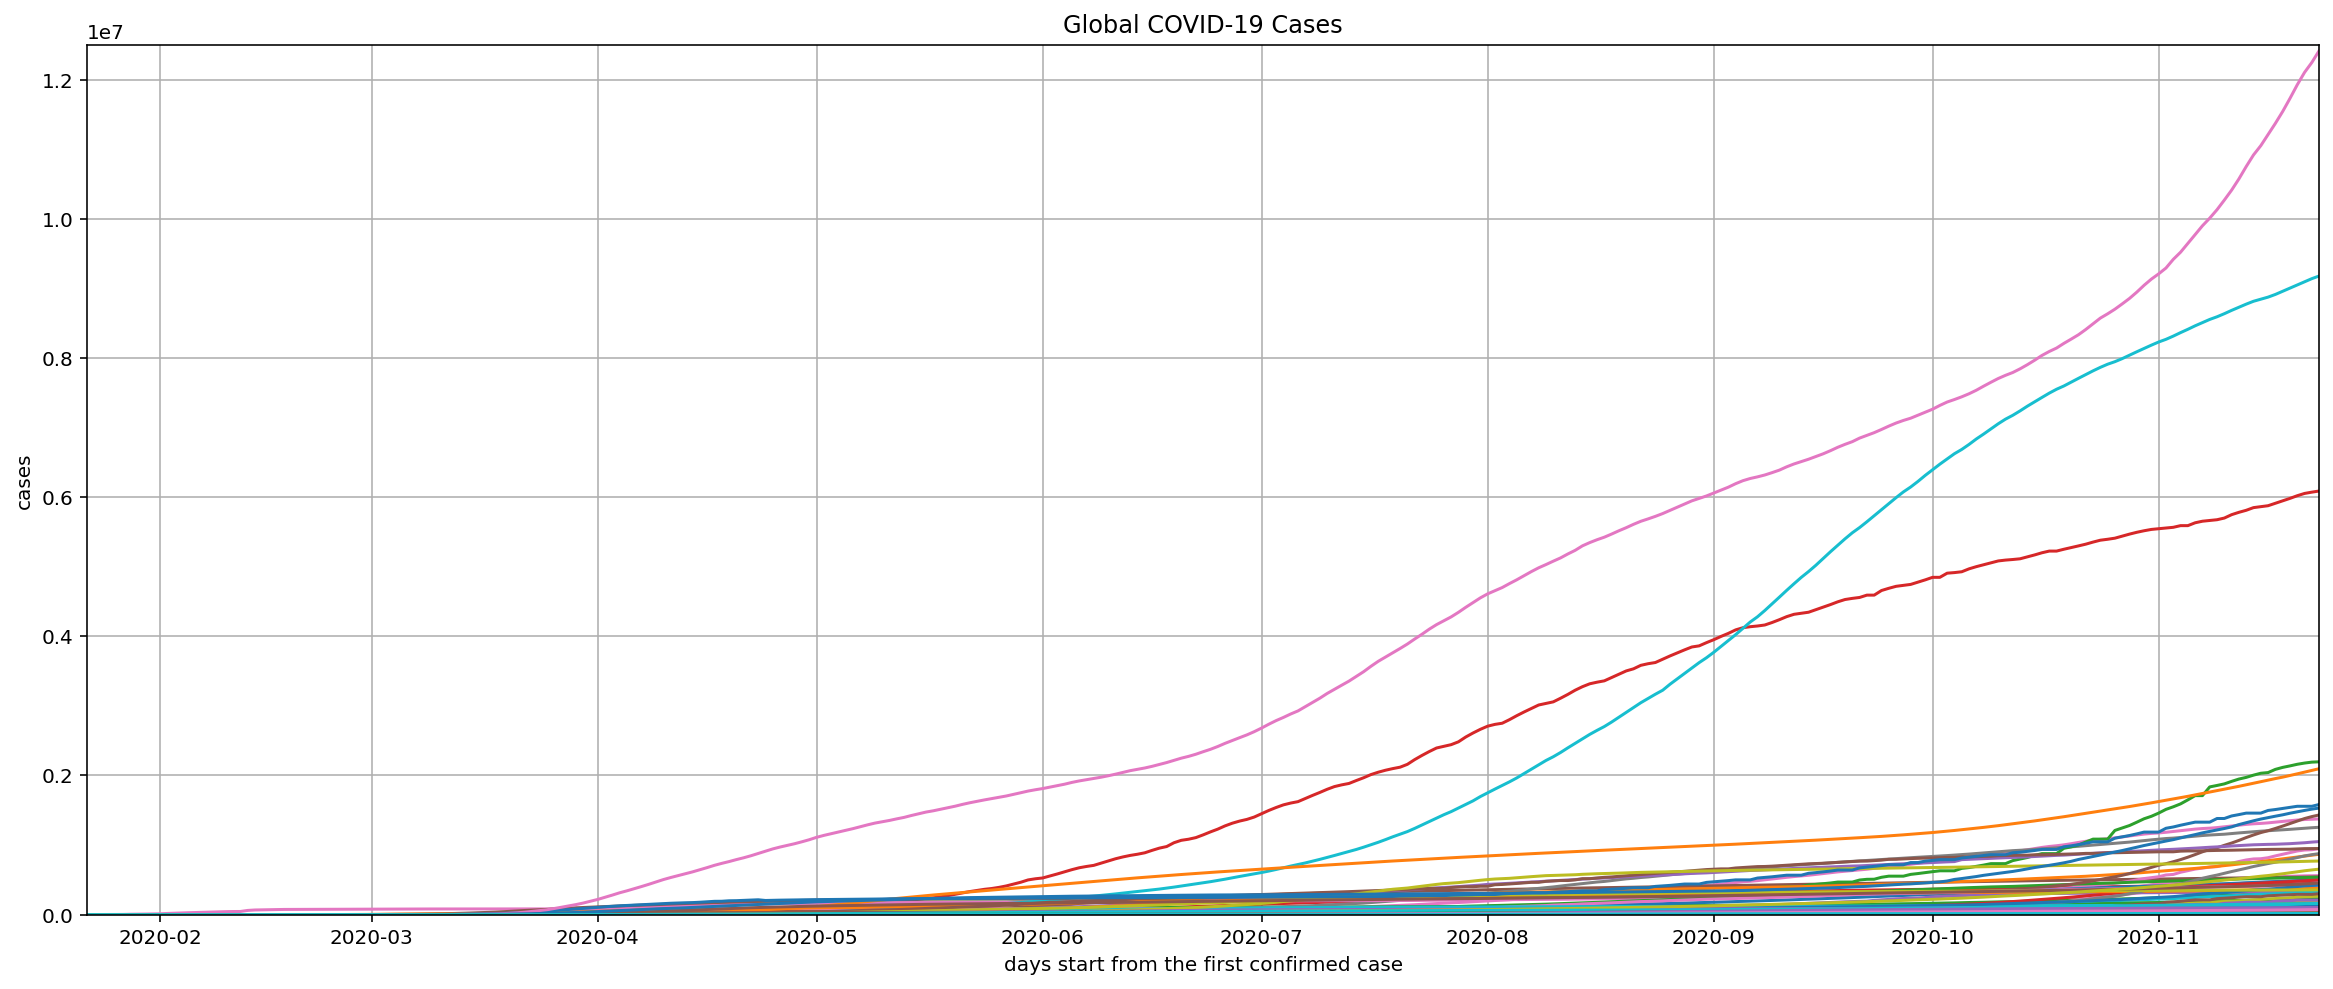

In [115]:
import datetime as datetime

plt.subplots(figsize=(20,8))

#plot the data with date

#extract the date
rows = []
date = []
for row in df_slice:
    rows.append(row)
for date_dt in rows:
    date_dt = datetime.datetime.strptime(date_dt ,'%m/%d/%y')
    date.append(date_dt)
    
    
for i in range(0,190):
    case=[]
    row= df_slice.iloc[i,:]   #extract the data of every country
    for cnt in row:
        case.append(cnt)
    plt.plot(date,case)
    
plt.xlabel('days start from the first confirmed case')
plt.ylabel('cases')
plt.title('Global COVID-19 Cases')
plt.grid()
plt.xlim(datetime.date(2020, 1, 22), datetime.date(2020,11,23))
plt.ylim(0,12500000)

## Policies Taken by Countries

In [69]:
## import the policy data
path2 = 'covid-policy-tracker/data/OxCGRT_latest_responses.csv'
df_policy = pd.read_csv(path2,parse_dates=[2,3]) 
df_policy.rename(columns = {'CountryName':'Country/Region'}, inplace = True)
df_policy.head(10)

Country/Region CountryCode  StartDate    EndDate  \
0          Aruba         ABW 2020-03-10 2020-06-24   
1          Aruba         ABW 2020-03-16 2020-05-17   
2          Aruba         ABW 2020-03-17 2020-06-09   
3          Aruba         ABW 2020-03-18        NaT   
4          Aruba         ABW 2020-03-19        NaT   
5          Aruba         ABW 2020-03-21 2020-03-28   
6          Aruba         ABW 2020-03-21 2020-03-28   
7          Aruba         ABW 2020-03-29 2020-05-03   
8          Aruba         ABW 2020-03-29 2020-09-10   
9          Aruba         ABW 2020-03-29 2020-05-17   

                          PolicyType  PolicyValue  Flag  \
0                 H2: Testing policy          1.0   NaN   
1                 C1: School closing          3.0   1.0   
2  C8: International travel controls          4.0   NaN   
3   H1: Public information campaigns          2.0   1.0   
4                H3: Contact tracing          1.0   NaN   
5              C2: Workplace closing          2.0   1.0   
6      C6: Stay at home requirements          1.0   1.0   
7              C2: Workplace closing          3.0   1.0   
8           C3: Cancel public events          2.0   1.0   
9     C4: Restrictions on gatherings          4.0   1.0   

                                         InitialNote  
0  March 10, 2020 – According to a statement by A...  
1  Schools are closed starting Monday, March 16 t...  
2  Two days after the government of Aruba confirm...  
3  "ORANJESTAD – In connection with the COVID-19 ...  
4  Contact tracing was noted a few times in the d...  
5  "ORANJESTAD - The Police Department of Aruba h...  
6  Mandatory curfew between 9pm and 6am everyday ...  
7  Starting March 29, 2020, a Shelter in Place is...  
8  Starting March 29, 2020, a Shelter in Place is...  
9  Starting March 29, 2020, a Shelter in Place is...

In [70]:
# the earliest date to take action
df_earl =  df_policy.groupby('Country/Region').first()

In [10]:

# no confirmed cases

days=[]
for b in range(0,191):
    row=df_slice.iloc[b,:]   #extract the data of every country
    a = 0
    for cnt in row:
        if cnt < 1:
            a = a + 1
    days.append(a)
pd.to_timedelta(days, unit ='d')
orig_time = datetime.datetime.strptime('01/22/20', '%m/%d/%y')
confirmed_time = orig_time+pd.to_timedelta(days, unit ='d')
confirmed_time

DatetimeIndex(['2020-02-24', '2020-03-09', '2020-02-25', '2020-03-02',
               '2020-03-20', '2020-03-13', '2020-03-03', '2020-03-01',
               '2020-01-26', '2020-02-25',
               ...
               '2020-03-13', '2020-03-15', '2020-11-10', '2020-03-14',
               '2020-01-23', '2020-03-05', '2020-04-05', '2020-04-10',
               '2020-03-18', '2020-03-20'],
              dtype='datetime64[ns]', length=191, freq=None)

In [11]:
# add the 
df_slice.loc[:,'confirmed_time'] = confirmed_time
df_confirmed = df_slice
df_confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  11/15/20  \
Country/Region                                          ...             
Afghanistan               0        0        0        0  ...     43240   
Albania                   0        0        0        0  ...     27830   
Algeria                   0        0        0        0  ...     67679   
Andorra                   0        0        0        0  ...      5872   
Angola                    0        0        0        0  ...     13451   
...                     ...      ...      ...      ...  ...       ...   
West Bank and Gaza        0        0        0        0  ...     63031   
Western Sahara            0        0        0        0  ...        10   
Yemen                     0        0        0        0  ...      2072   
Zambia                    0        0        0        0  ...     17123   
Zimbabwe                  0        0        0        0  ...      8829   

                    11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  \
Country/Region                                                         
Afghanistan            43403     43628     43851     44228     44443   
Albania                28432     29126     29837     30623     31459   
Algeria                68589     69591     70629     71652     72755   
Andorra                 5914      5951      6018      6066      6142   
Angola                 13615     13818     13922     14134     14267   
...                      ...       ...       ...       ...       ...   
West Bank and Gaza     63867     64935     66186     67296     68768   
Western Sahara            10        10        10        10        10   
Yemen                   2078      2081      2083      2086      2090   
Zambia                 17187     17243     17280     17350     17373   
Zimbabwe                8897      8945      8981      9046      9120   

                    11/21/20  11/22/20  11/23/20  confirmed_time  
Country/Region                                                    
Afghanistan            44503     44706     44988      2020-02-24  
Albania                32196     32761     33556      2020-03-09  
Algeria                73774     74862     75867      2020-02-25  
Andorra                 6207      6256      6304      2020-03-02  
Angola                 14413     14493     14634      2020-03-20  
...                      ...       ...       ...             ...  
West Bank and Gaza     70254     71644     73196      2020-03-05  
Western Sahara            10        10        10      2020-04-05  
Yemen                   2093      2099      2107      2020-04-10  
Zambia                 17394     17424     17454      2020-03-18  
Zimbabwe                9172      9220      9308      2020-03-20  

[191 rows x 308 columns]

In [12]:
#drop useless columns
df_new = df_confirmed.drop(df_confirmed.iloc[:,0:306], axis = 1) 
df_new.head(5)

11/23/20 confirmed_time
Country/Region                         
Afghanistan        44988     2020-02-24
Albania            33556     2020-03-09
Algeria            75867     2020-02-25
Andorra             6304     2020-03-02
Angola             14634     2020-03-20

In [13]:
# combine the confirmed cases data with the policy data
df_merged = pd.merge(df_new, df_earl,on='Country/Region')
df_merged.head(5)

11/23/20 confirmed_time CountryCode  StartDate    EndDate  \
Country/Region                                                              
Afghanistan        44988     2020-02-24         AFG 2020-02-23 2020-06-08   
Albania            33556     2020-03-09         ALB 2020-02-14 2020-03-09   
Algeria            75867     2020-02-25         DZA 2020-03-05 2020-04-13   
Andorra             6304     2020-03-02         AND 2020-03-02 2020-04-17   
Angola             14634     2020-03-20         AGO 2020-02-06 2020-02-29   

                                       PolicyType  PolicyValue  Flag  \
Country/Region                                                         
Afghanistan     C8: International travel controls          3.0   0.0   
Albania          H1: Public information campaigns          1.0   1.0   
Algeria          H1: Public information campaigns          1.0   1.0   
Andorra                        H2: Testing policy          1.0   1.0   
Angola          C8: International travel controls          2.0   1.0   

                                                      InitialNote  
Country/Region                                                     
Afghanistan     Afghanistan bans all passenger movement (inclu...  
Albania         First information about coronavirus put out on...  
Algeria         "Health authorities have been calling on citiz...  
Andorra         'A 20 year-old man with mild symptoms who was ...  
Angola          https://web.archive.org/web/20200323164000/htt...

In [14]:
# figure out the time that every country took to react to this pandemic
duration = df_merged['EndDate'] - df_merged['StartDate']
react_time = df_merged['StartDate']- df_merged['confirmed_time']
print(react_time)

df_merged.loc[:,'react_time'] = react_time
df_merged.loc[:,'duration'] = duration

Country/Region
Afghanistan    -1 days
Albania       -24 days
Algeria         9 days
Andorra         0 days
Angola        -43 days
                ...   
Venezuela     -33 days
Vietnam         2 days
Yemen         -26 days
Zambia        -26 days
Zimbabwe      -53 days
Length: 161, dtype: timedelta64[ns]


In [15]:
#locate the earliest responses
df_merged.nsmallest(10,'react_time')

#Take Tajikistan, Botswana, Uganda and Indonesia as examples

11/23/20 confirmed_time CountryCode  StartDate    EndDate  \
Country/Region                                                               
Solomon Islands        16     2020-10-12         SLB 2020-02-06 2020-07-27   
Vanuatu                 1     2020-11-10         VUT 2020-03-26 2020-05-17   
Tajikistan          11932     2020-04-30         TJK 2020-01-21 2020-03-17   
Lesotho              2086     2020-05-13         LSO 2020-03-04 2020-03-18   
Botswana             9992     2020-03-30         BWA 2020-01-24 2020-03-15   
Brunei                149     2020-03-09         BRN 2020-01-06 2020-03-23   
Uganda              18165     2020-03-21         UGA 2020-01-20 2020-02-05   
Mongolia              672     2020-03-10         MNG 2020-01-10 2020-01-21   
Burundi               664     2020-03-31         BDI 2020-02-01 2020-03-21   
Indonesia          502110     2020-03-02         IDN 2020-01-03 2020-01-28   

                                        PolicyType  PolicyValue  Flag  \
Country/Region                                                          
Solomon Islands  C8: International travel controls          3.0   1.0   
Vanuatu                         C1: School closing          3.0   1.0   
Tajikistan        H1: Public information campaigns          1.0   1.0   
Lesotho           H1: Public information campaigns          1.0   1.0   
Botswana          H1: Public information campaigns          2.0   1.0   
Brunei            H1: Public information campaigns          2.0   1.0   
Uganda           C8: International travel controls          1.0   1.0   
Mongolia                      H6: Facial Coverings          1.0   1.0   
Burundi           H1: Public information campaigns          1.0   1.0   
Indonesia         H1: Public information campaigns          1.0   1.0   

                                                       InitialNote react_time  \
Country/Region                                                                  
Solomon Islands  Travelers from countries with confirmed 2019-n...  -249 days   
Vanuatu          https://web.archive.org/web/20200611220024/htt...  -229 days   
Tajikistan       The Tajik Ministry of Health sent a letter to ...  -100 days   
Lesotho          The ministry however reassured that it will co...   -70 days   
Botswana         Social media and gov communication providing i...   -66 days   
Brunei           The Ministry of Health has a website with all ...   -63 days   
Uganda           screenings start at Entebbe airport https://ww...   -61 days   
Mongolia         On January 10, we issued our first public advi...   -60 days   
Burundi          First advisory (communiqué) was issued with me...   -59 days   
Indonesia        The Health Ministry has has had a travel advis...   -59 days   

                duration  
Country/Region            
Solomon Islands 172 days  
Vanuatu          52 days  
Tajikistan       56 days  
Lesotho          14 days  
Botswana         51 days  
Brunei           77 days  
Uganda           16 days  
Mongolia         11 days  
Burundi          49 days  
Indonesia        25 days

In [31]:
df_merged.nlargest(10,'react_time')
#Take Chile, Belarus, Algeria and Senegal as examples

11/23/20 confirmed_time CountryCode  StartDate    EndDate  \
Country/Region                                                              
Cambodia             306     2020-01-27         KHM 2020-03-07 2020-09-06   
Thailand            3922     2020-01-22         THA 2020-03-02 2020-04-30   
Comoros              596     2020-04-30         COM 2020-05-22 2020-08-06   
Chile             542080     2020-02-23         CHL 2020-03-14 2020-10-04   
Belarus           125482     2020-02-28         BLR 2020-03-14 2020-04-02   
Algeria            75867     2020-02-25         DZA 2020-03-05 2020-04-13   
Senegal            15897     2020-03-02         SEN 2020-03-06 2020-04-10   
Estonia             9956     2020-02-27         EST 2020-03-01 2020-05-31   
Jordan            188410     2020-03-03         JOR 2020-03-05 2020-03-08   
Vietnam             1312     2020-01-23         VNM 2020-01-25 2020-01-29   

                                       PolicyType  PolicyValue  Flag  \
Country/Region                                                         
Cambodia                       C1: School closing          3.0   1.0   
Thailand                       H2: Testing policy          1.0   1.0   
Comoros                      H6: Facial Coverings          2.0   1.0   
Chile            H1: Public information campaigns          2.0   1.0   
Belarus         C8: International travel controls          3.0   1.0   
Algeria          H1: Public information campaigns          1.0   1.0   
Senegal                        H2: Testing policy          1.0   1.0   
Estonia                        E1: Income support          2.0   0.0   
Jordan           H1: Public information campaigns          2.0   1.0   
Vietnam         C8: International travel controls          1.0   0.0   

                                                      InitialNote react_time  \
Country/Region                                                                 
Cambodia        https://web.archive.org/web/20200729160421/htt...    40 days   
Thailand        Thailand's Department of Disease Control annou...    40 days   
Comoros         Face masks are compulsory in markets starting ...    22 days   
Chile           Ministry of health announces COVID response ha...    20 days   
Belarus         Flights to and from affected countries have be...    15 days   
Algeria         "Health authorities have been calling on citiz...     9 days   
Senegal         Ministry of health daily updats only reported ...     4 days   
Estonia         The Estonian Unemployment Insurance Fund will ...     3 days   
Jordan          On March 5, abriefing noted that a free hotlin...     2 days   
Vietnam         Announced on Jan 23: "To prevent the epidemics...     2 days   

               duration  
Country/Region           
Cambodia       183 days  
Thailand        59 days  
Comoros         76 days  
Chile          204 days  
Belarus         19 days  
Algeria         39 days  
Senegal         35 days  
Estonia         91 days  
Jordan           3 days  
Vietnam          4 days

11/23/20 confirmed_time CountryCode  StartDate    EndDate  \
Country/Region                                                              
India            9177840     2020-01-30         IND 2020-01-25 2020-03-04   
Brazil           6087608     2020-02-26         BRA 2020-01-23 2020-05-24   
France           2195940     2020-01-24         FRA 2020-01-24 2020-02-24   
Russia           2096749     2020-01-31         RUS 2020-01-30 2020-03-29   
Spain            1582616     2020-02-01         ESP 2020-01-24 2020-04-04   
United Kingdom   1531267     2020-01-31         GBR 2020-01-20 2020-01-30   
Italy            1431795     2020-01-31         ITA 2020-01-23 2020-01-29   
Argentina        1374631     2020-03-03         ARG 2020-01-23 2020-09-30   
Colombia         1254979     2020-03-06         COL 2020-01-21 2020-03-08   
Mexico           1049358     2020-02-28         MEX 2020-02-28 2020-03-20   

                                       PolicyType  PolicyValue  Flag  \
Country/Region                                                         
India            H1: Public information campaigns          1.0   1.0   
Brazil                         H2: Testing policy          1.0   1.0   
France           H1: Public information campaigns          2.0   0.0   
Russia          C8: International travel controls          3.0   0.0   
Spain                          H2: Testing policy          1.0   1.0   
United Kingdom   H1: Public information campaigns          1.0   1.0   
Italy           C8: International travel controls          1.0   1.0   
Argentina        H1: Public information campaigns          2.0   1.0   
Colombia         H1: Public information campaigns          2.0   0.0   
Mexico          C8: International travel controls          1.0   1.0   

                                                      InitialNote react_time  \
Country/Region                                                                 
India           The Ministry of Health and Family Welfare has ...    -5 days   
Brazil          On 23 January the Brazilian Ministry of Health...   -34 days   
France          FAQ of government: Distribution of flyers in E...     0 days   
Russia          Russia closes borders and bans travel in Far E...    -1 days   
Spain           Potential case tested by Foreign Health servic...    -8 days   
United Kingdom    [Advice for symptomatic individuals returnin...   -11 days   
Italy           Starting from 23 January, date in which the ne...    -8 days   
Argentina       https://www.argentina.gob.ar/noticias/tenemos-...   -40 days   
Colombia        Centralised and regular communication and medi...   -45 days   
Mexico          Screening people who had recently travelled to...     0 days   

               duration  
Country/Region           
India           39 days  
Brazil         122 days  
France          31 days  
Russia          59 days  
Spain           71 days  
United Kingdom  10 days  
Italy            6 days  
Argentina      251 days  
Colombia        47 days  
Mexico          21 days

## The Effect of Reaction Time

Text(0, 0.5, 'log 10 of the confirmed cases')

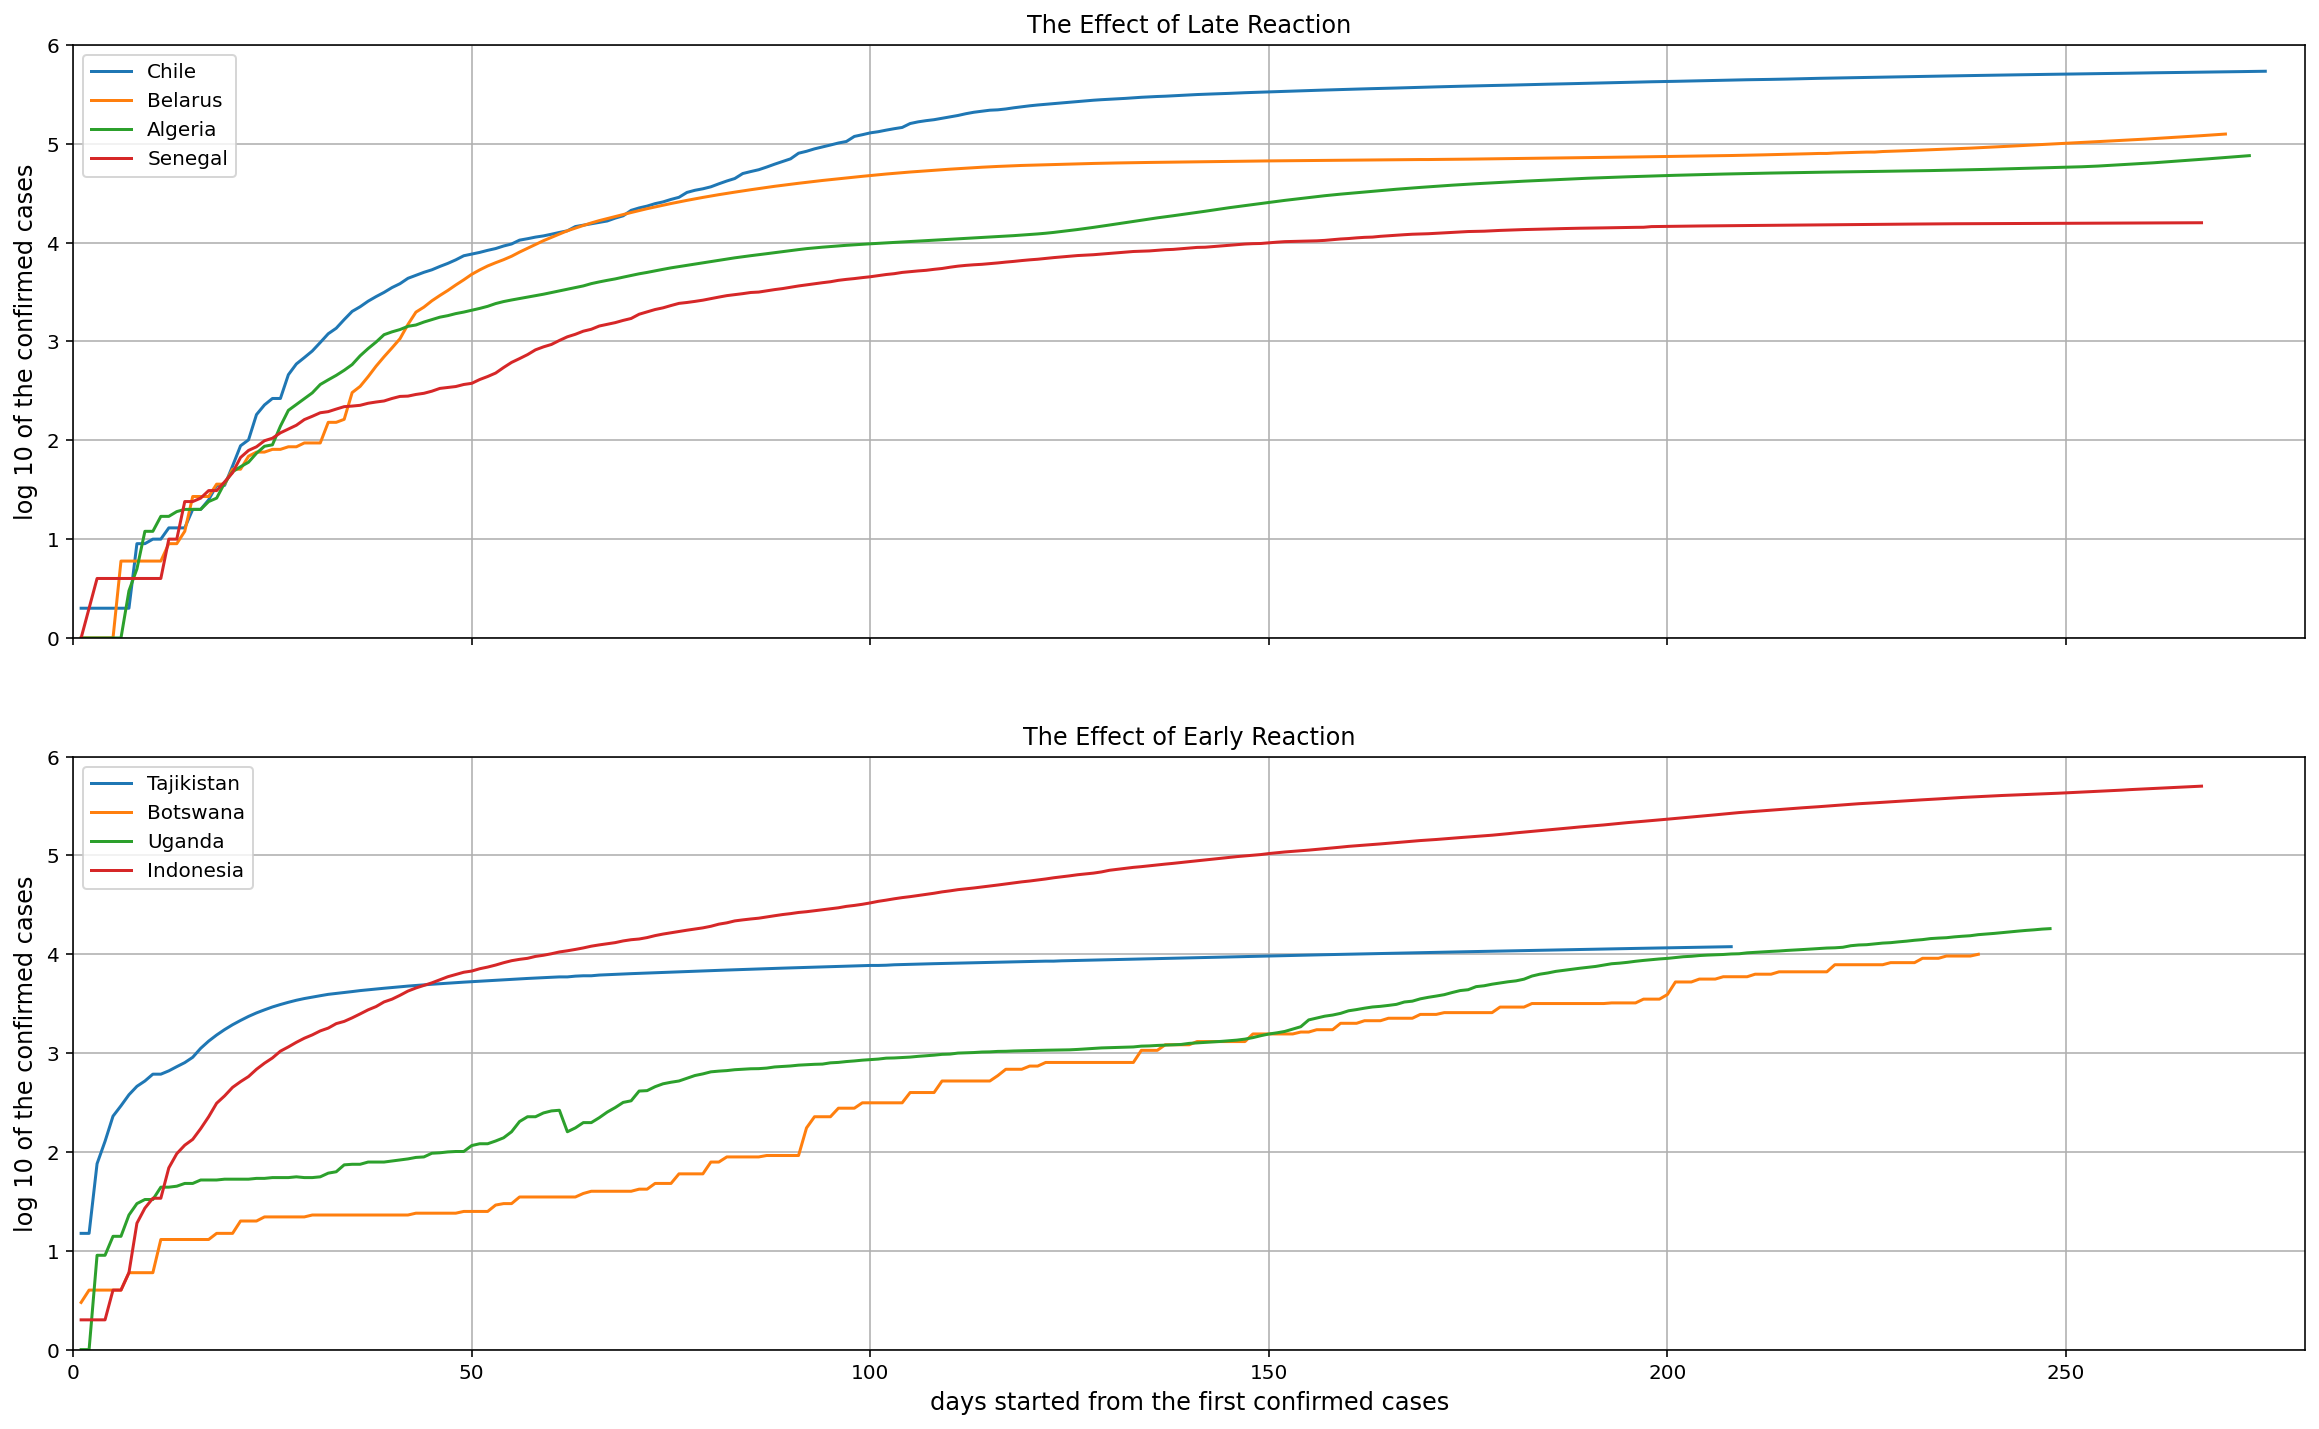

In [134]:
# 4 countries with late response

fig, ax = plt.subplots(nrows = 2,figsize = (20,12), sharex= True )

df_slice2=df_slice.iloc[:,0:307]
c1=[]
for c in df_slice2.loc['Chile']:
    if c >=1:
        c1.append(c)
        
df_slice2=df_slice.iloc[:,0:307]
c2=[]
for c in df_slice2.loc['Belarus']:
    if c >=1:
        c2.append(c)
        
df_slice2=df_slice.iloc[:,0:307]
c3=[]
for c in df_slice2.loc['Algeria']:
    if c >= 1:
        c3.append(c)

df_slice2=df_slice.iloc[:,0:307]
c4=[]
for c in df_slice2.loc['Senegal']:
    if c >= 1:
        c4.append(c)
                
        
ax[0].plot(np.arange(1,len(c1)+1),np.log10(c1), label = 'Chile')
ax[0].plot(np.arange(1,len(c2)+1),np.log10(c2),label = 'Belarus')
ax[0].plot(np.arange(1,len(c3)+1),np.log10(c3),label= 'Algeria')
ax[0].plot(np.arange(1,len(c4)+1),np.log10(c4), label = 'Senegal')

x_coordinates = [9, 9]
y_coordinates = [2, 5]
#plt.plot(x_coordinates,y_coordinates,linestyle = ':', label = 'Approximate react day')

ax[0].set_xlim(0, 280)
ax[0].set_ylim(0, 6)
ax[0].legend()
ax[0].grid()
ax[0].set_title('The Effect of Late Reaction')
ax[0].set_ylabel('log 10 of the confirmed cases',fontsize= 12)

# 4 countries with early response

df_slice2=df_slice.iloc[:,0:307]
d1=[]
for d in df_slice2.loc['Tajikistan']:
    if d >= 1:
        d1.append(d)
        
df_slice2=df_slice.iloc[:,0:307]
d2=[]
for d in df_slice2.loc['Botswana']:
    if d >= 1:
        d2.append(d)
        
df_slice2=df_slice.iloc[:,0:307]
d3=[]
for d in df_slice2.loc['Uganda']:
    if d >= 1:
        d3.append(d)

df_slice2=df_slice.iloc[:,0:307]
d4=[]
for d in df_slice2.loc['Indonesia']:
    if d >= 1:
        d4.append(d)
                
        
ax[1].plot(np.arange(1,len(d1)+1),np.log10(d1), label = 'Tajikistan')
ax[1].plot(np.arange(1,len(d2)+1),np.log10(d2),label = 'Botswana')
ax[1].plot(np.arange(1,len(d3)+1),np.log10(d3),label= 'Uganda')
ax[1].plot(np.arange(1,len(d4)+1),np.log10(d4), label = 'Indonesia')


ax[1].set_xlim(0, 280)
ax[1].set_ylim(0, 6)
ax[1].legend()
ax[1].grid()
ax[1].set_title('The Effect of Early Reaction')
ax[1].set_xlabel('days started from the first confirmed cases',fontsize= 12)
ax[1].set_ylabel('log 10 of the confirmed cases',fontsize= 12)


The early reaction countries selected took actions before the first case was confirmed in these countries. We could see that they experienced a shorter duration of the pandemic because of the late dignosis the first cases. When the COVID-19 began spreading within these countries, they could react faster and curb the trend, as given in the plot that these early reaction countries reached the inflection point of the COVID-19 epidemic in a short period of time(less than 50 days).


The late reaction countries react couples of days later after the first confirmed case. From the plot, the curve remains a straight line in the first 50 days and slow down a little bit in the next 50 days, then comes the inflection point. With this tendency, the late reaction countries endured a longer pandemic, with more confirmed cases compared to the early reaction countries.

## Growth Modeling
Take the United States as an example

Epoch [5000/100000], LossL:3283814400.0000
Epoch [10000/100000], LossL:161303584.0000
Epoch [15000/100000], LossL:1251841.1250
Epoch [20000/100000], LossL:331326.0000
Epoch [25000/100000], LossL:129192.1641
Epoch [30000/100000], LossL:88785.7656
Epoch [35000/100000], LossL:91980.6250
Epoch [40000/100000], LossL:72238.9297
Epoch [45000/100000], LossL:60921.9453
Epoch [50000/100000], LossL:54536.6328
Epoch [55000/100000], LossL:56633.7617
Epoch [60000/100000], LossL:57966.9336
Epoch [65000/100000], LossL:48971.6328
Epoch [70000/100000], LossL:45006.3125
Epoch [75000/100000], LossL:47517.4180
Epoch [80000/100000], LossL:47679.3164
Epoch [85000/100000], LossL:45777.2227
Epoch [90000/100000], LossL:43108.1211
Epoch [95000/100000], LossL:44658.9570
Epoch [100000/100000], LossL:47512.8281


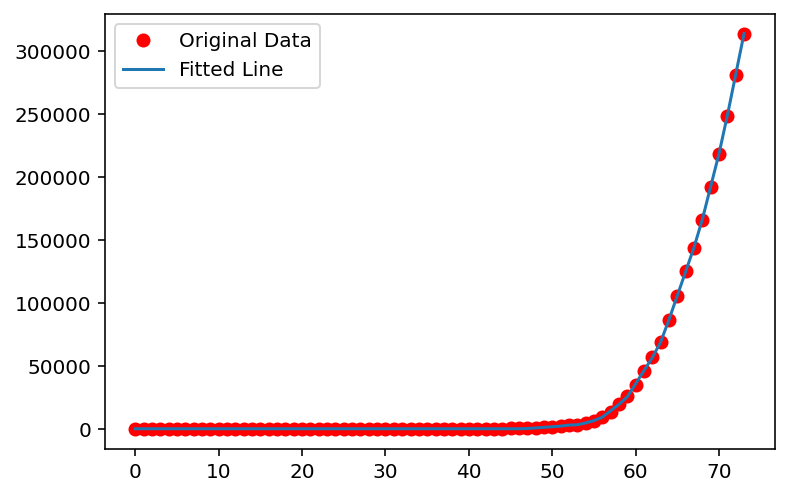

In [137]:
#data training (in this part, only the data from 1/22/20 to 4/4/20 were used for training)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#setting parameters
input_size = 1
output_size = 1
num_epochs = 100000
learning_rate = 0.001


#building model
class MLP(nn.Module):
    def __init__(self, n_i, n_h, n_o):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(n_i, 8)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(8, 16)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(8, n_o)
        # self.relu4 = nn.ReLU()
        # self.linear5 = nn.Linear(32, n_o)

    def forward(self, input):
        x = self.relu1(self.linear1(input))
        x = self.relu2(self.linear2(x))

        x = self.relu3(self.linear3(x))
        # x = self.relu4(self.linear4(x))
        x = self.linear4(x)
        return x

# data
x_train =  list(range(74))
x_train = sorted(x_train)
y_train =  df_case_us[0:74]

x_train_list =[]
y_train_list =[]
for x in x_train:
    x_train_list.append([x])
for y in y_train:
    y_train_list.append([y])
    
x_train = np.array(x_train_list,dtype=np.float32)
y_train = np.array(y_train_list,dtype=np.float32)


#training

model = MLP(1, 64, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print("Epoch [{}/{}], LossL:{:.4f}".format(epoch + 1, num_epochs, loss.item()))

predicted = model(torch.from_numpy(x_train)).detach().numpy()

#print(y_train)
#print(predicted)

plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()

#save the model
torch.save(model.state_dict(), 'model.ckpt')

In [138]:
#model

class MLP(nn.Module):
    def __init__(self, n_i, n_h, n_o):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(n_i, 8)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(8, 16)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(8, n_o)
        # self.relu4 = nn.ReLU()
        # self.linear5 = nn.Linear(32, n_o)

    def forward(self, input):
        x = self.relu1(self.linear1(input))
        x = self.relu2(self.linear2(x))

        x = self.relu3(self.linear3(x))
        # x = self.relu4(self.linear4(x))
        x = self.linear4(x)
        return x
model = MLP(1, 64, 1)
model.load_state_dict(torch.load('model.ckpt'))
model.eval()


x = []
for i in range(307):
    x.append([i])
x = np.array(x,dtype=np.float32)
x = torch.from_numpy(x)

y = model(x).detach().numpy().tolist()

In [139]:
#get the comfirmed cases data of the United States
df_slice2=df_slice.iloc[:,0:307]
df_case_us = df_slice2.loc['US']

Text(0, 0.5, 'total cases')

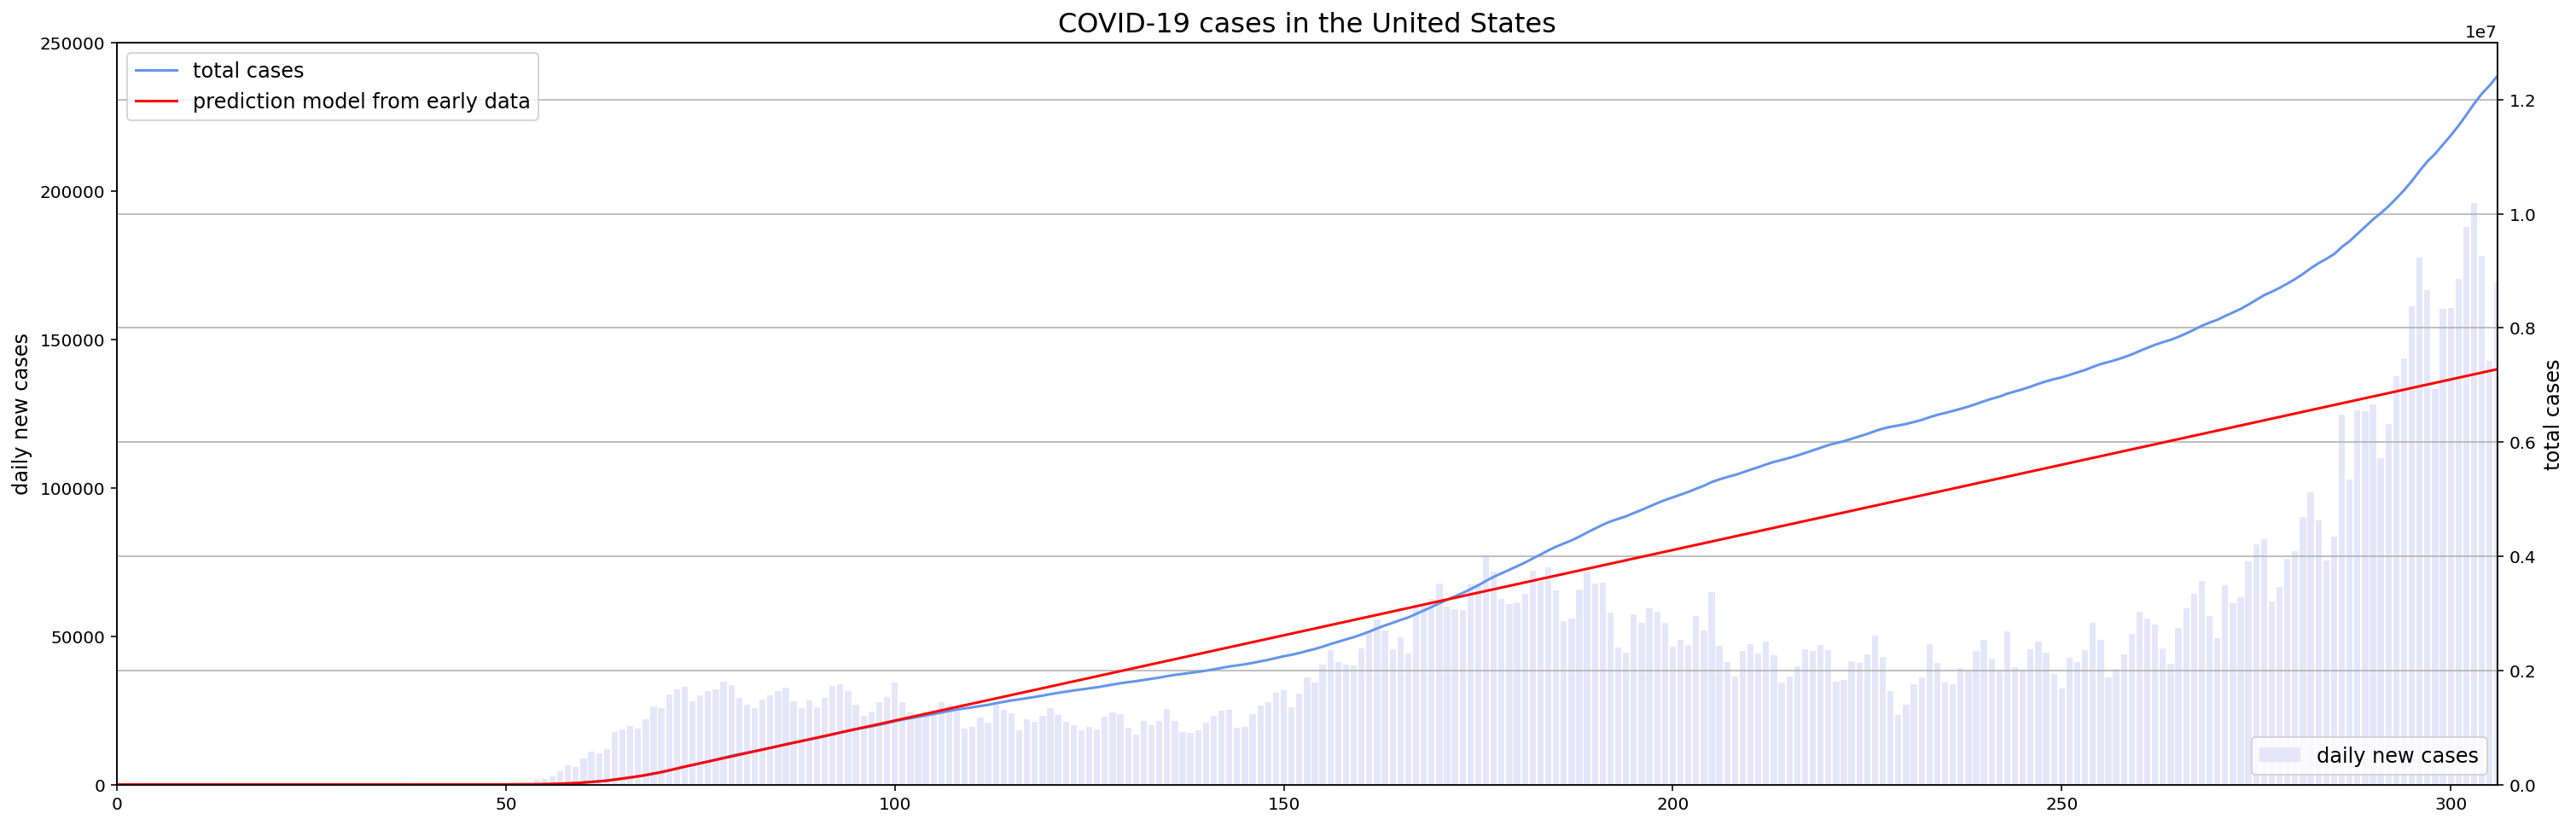

In [140]:
import datetime as datetime
fig,ax1 =plt.subplots(figsize = (25,8))

#extract the daily confirmed cases data into a list       
e1=[1]
for i in range(1,len(df_case_us)):
    e1.append(df_case_us[i]-df_case_us[i-1])

dt = list(range(307))
#plot the daily cases
ax1.bar(dt, e1, color = 'lavender', label = 'daily new cases') 
ax1.set_ylim(0,250000)
ax1.set_ylabel('daily new cases',fontsize= 12)
ax1.legend(loc='lower right',fontsize= 12)

#plot the accumulative cases
ax2=ax1.twinx()    
ax2.plot(dt,df_case_us,color = 'cornflowerblue', label = 'total cases') 
ax2.grid()
ax2.set_ylim(0,13000000)
ax2.set_xlim(0,306)
ax2.set_title('COVID-19 cases in the United States',fontsize= 16)
ax2.plot(x,y,color='r',label = 'prediction model from early data')
ax2.legend(fontsize= 12)
ax2.set_xlabel('days',fontsize= 12)
ax2.set_ylabel('total cases',fontsize= 12)

## The Effect of Different Policies
Take the United States as an example

The policy value indicates the stingency of the policies, with 1.0 as loose policies and 4.0 as stringent policies.
the flag column in the dataframe indicates whether this policy targets at a specific region(0.0) or is a general policy around the country(1.0)

In [102]:
#get the policy data of the United States
df_us = df_policy.groupby('Country/Region').get_group('United States')
df_us.head(5)

Country/Region CountryCode  StartDate    EndDate  \
6788  United States         USA 2020-01-21        NaT   
6789  United States         USA 2020-02-02 2020-03-01   
6790  United States         USA 2020-02-28 2020-03-03   
6791  United States         USA 2020-03-01 2020-03-11   
6792  United States         USA 2020-03-02        NaT   

                             PolicyType  PolicyValue  Flag  \
6788                H3: Contact tracing          1.0   NaN   
6789  C8: International travel controls          2.0   NaN   
6790                 H2: Testing policy          1.0   NaN   
6791           C3: Cancel public events          1.0   0.0   
6792  C8: International travel controls          3.0   NaN   

                                            InitialNote  
6788  "Contact tracing was used in Seattle and parts...  
6789  Starting Sunday, passengers flying to the U.S....  
6790  Some testing was carried out before this, but ...  
6791  CDC upgrades it's warning to level 3, meaning ...  
6792  As of March 2, foreign nationals who have trav...

Text(0, 0.5, 'daily new cases')

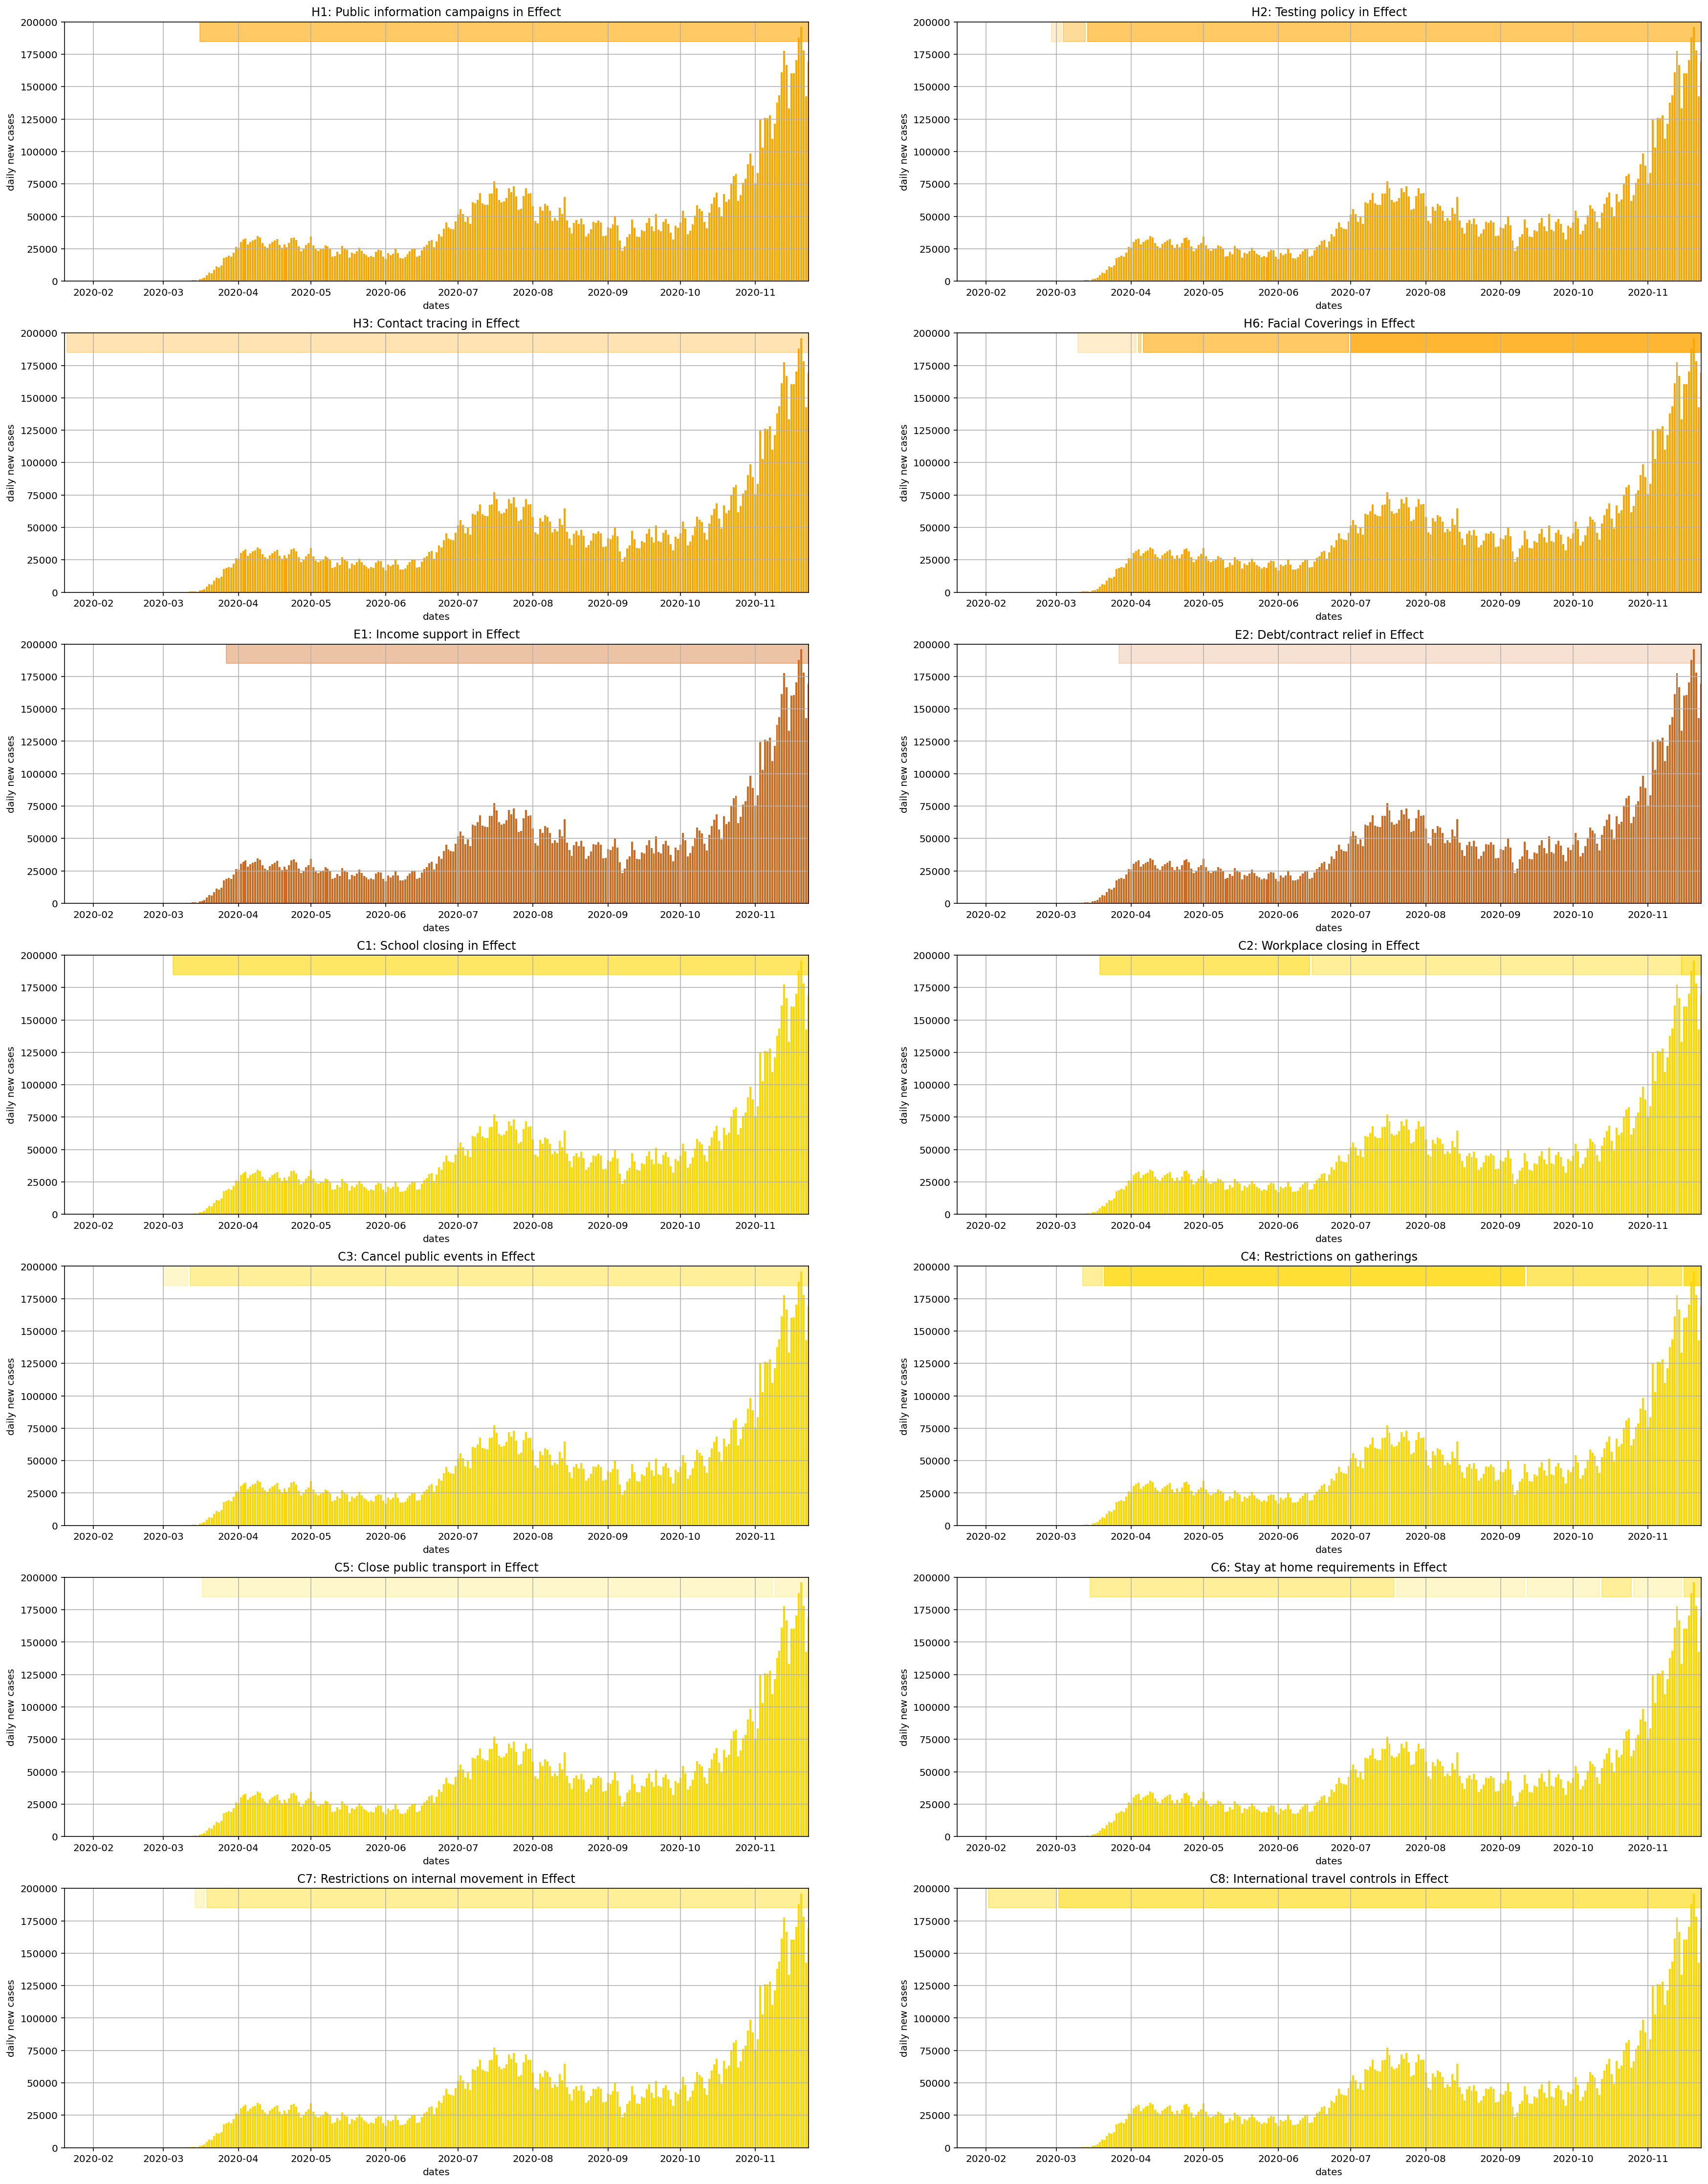

In [26]:
# health system poliies
fig, ax =plt.subplots(nrows = 7, ncols=2, figsize =(30,40))

datelist00 = pd.date_range(start = '2020-03-16',end='2020-11-23')
ax[0,0].fill_between(datelist00,185000,200000, color = 'orange', alpha = 0.6)
ax[0,0].bar(date, e1, color = 'orange') 
ax[0,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[0,0].set_ylim(0, 200000)
ax[0,0].grid()
ax[0,0].set_title('H1: Public information campaigns in Effect')
ax[0,0].set_xlabel('dates')
ax[0,0].set_ylabel('daily new cases')

datelist011 = pd.date_range(start = '2020-02-28',end='2020-03-03')
datelist012 = pd.date_range(start = '2020-03-04',end='2020-03-13')
datelist013 = pd.date_range(start = '2020-03-14',end='2020-11-23')
ax[0,1].fill_between(datelist011, 185000,200000, color = 'orange', alpha = 0.2)
ax[0,1].fill_between(datelist012, 185000,200000, color = 'orange', alpha = 0.4)
ax[0,1].fill_between(datelist013, 185000,200000, color = 'orange', alpha = 0.6)
ax[0,1].bar(date, e1, color = 'orange') 
ax[0,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[0,1].set_ylim(0, 200000)
ax[0,1].grid()
ax[0,1].set_title('H2: Testing policy in Effect')
ax[0,1].set_xlabel('dates')
ax[0,1].set_ylabel('daily new cases')


datelist021 = pd.date_range(start = '2020-01-21',end='2020-11-23')
ax[1,0].fill_between(datelist021, 185000,200000, color = 'orange', alpha = 0.3)
ax[1,0].bar(date, e1, color = 'orange') 
ax[1,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[1,0].set_ylim(0, 200000)
ax[1,0].grid()
ax[1,0].set_title('H3: Contact tracing in Effect')
ax[1,0].set_xlabel('dates')
ax[1,0].set_ylabel('daily new cases')

datelist031 = pd.date_range(start = '2020-03-10',end='2020-04-03')
datelist032 = pd.date_range(start = '2020-04-04',end='2020-04-05')
datelist033 = pd.date_range(start = '2020-04-06',end='2020-06-30')
datelist034 = pd.date_range(start = '2020-07-1',end='2020-11-23')
ax[1,1].fill_between(datelist031, 185000,200000, color = 'orange', alpha = 0.2)
ax[1,1].fill_between(datelist032, 185000,200000, color = 'orange', alpha = 0.4)
ax[1,1].fill_between(datelist033, 185000,200000, color = 'orange', alpha = 0.6)
ax[1,1].fill_between(datelist034, 185000,200000, color = 'orange', alpha = 0.8)

ax[1,1].bar(date, e1, color = 'orange') 
ax[1,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[1,1].set_ylim(0, 200000)
ax[1,1].grid()
ax[1,1].set_title('H6: Facial Coverings in Effect')
ax[1,1].set_xlabel('dates')
ax[1,1].set_ylabel('daily new cases')

#economy policies

datelist11 = pd.date_range(start = '2020-03-27',end='2020-11-23')
ax[2,0].fill_between(datelist11, 185000,200000, color = 'chocolate', alpha = 0.4)

ax[2,0].bar(date, e1, color = 'chocolate') 
ax[2,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[2,0].set_ylim(0, 200000)
ax[2,0].grid()
ax[2,0].set_title('E1: Income support in Effect')
ax[2,0].set_xlabel('dates')
ax[2,0].set_ylabel('daily new cases')

ax[2,1].fill_between(datelist11, 185000,200000, color = 'chocolate', alpha = 0.2)

ax[2,1].bar(date, e1, color = 'chocolate') 
ax[2,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[2,1].set_ylim(0, 200000)
ax[2,1].grid()
ax[2,1].set_title('E2: Debt/contract relief in Effect')
ax[2,1].set_xlabel('dates')
ax[2,1].set_ylabel('daily new cases')



#containment and closure policies

datelist210 = pd.date_range(start = '2020-03-05',end='2020-11-23')
ax[3,0].fill_between(datelist210, 185000,200000, color = 'gold', alpha = 0.6)


ax[3,0].bar(date, e1, color = 'gold') 
ax[3,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[3,0].set_ylim(0, 200000)
ax[3,0].grid()
ax[3,0].set_title('C1: School closing in Effect')
ax[3,0].set_xlabel('dates')
ax[3,0].set_ylabel('daily new cases')


datelist220 = pd.date_range(start = '2020-03-19',end='2020-06-14')
datelist221 = pd.date_range(start = '2020-06-15',end='2020-11-15')
datelist222 = pd.date_range(start = '2020-11-15',end='2020-11-23')
ax[3,1].fill_between(datelist220, 185000,200000, color = 'gold', alpha = 0.6)
ax[3,1].fill_between(datelist221, 185000,200000, color = 'gold', alpha = 0.4)
ax[3,1].fill_between(datelist222, 185000,200000, color = 'gold', alpha = 0.6)

ax[3,1].bar(date, e1, color = 'gold') 
ax[3,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[3,1].set_ylim(0, 200000)
ax[3,1].grid()
ax[3,1].set_title('C2: Workplace closing in Effect')
ax[3,1].set_xlabel('dates')
ax[3,1].set_ylabel('daily new cases')


datelist230 = pd.date_range(start = '2020-03-01',end='2020-03-11')
datelist231 = pd.date_range(start = '2020-03-12',end='2020-11-23')
ax[4,0].fill_between(datelist230, 185000,200000, color = 'gold', alpha = 0.2)
ax[4,0].fill_between(datelist231, 185000,200000, color = 'gold', alpha = 0.4)

ax[4,0].bar(date, e1, color = 'gold') 
ax[4,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[4,0].set_ylim(0, 200000)
ax[4,0].grid()
ax[4,0].set_title('C3: Cancel public events in Effect')
ax[4,0].set_xlabel('dates')
ax[4,0].set_ylabel('daily new cases')

datelist240 = pd.date_range(start = '2020-03-12',end='2020-03-20')
datelist241 = pd.date_range(start = '2020-03-21',end='2020-09-11')
datelist242 = pd.date_range(start = '2020-09-12',end='2020-11-15')
datelist243 = pd.date_range(start = '2020-11-16',end='2020-11-23')
ax[4,1].fill_between(datelist240, 185000,200000, color = 'gold', alpha = 0.4)
ax[4,1].fill_between(datelist241, 185000,200000, color = 'gold', alpha = 0.8)
ax[4,1].fill_between(datelist242, 185000,200000, color = 'gold', alpha = 0.6)
ax[4,1].fill_between(datelist243, 185000,200000, color = 'gold', alpha = 0.8)

ax[4,1].bar(date, e1, color = 'gold') 
ax[4,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[4,1].set_ylim(0, 200000)
ax[4,1].grid()
ax[4,1].set_title('C4: Restrictions on gatherings')
ax[4,1].set_xlabel('dates')
ax[4,1].set_ylabel('daily new cases')


datelist250 = pd.date_range(start = '2020-03-17',end='2020-11-08')
datelist251 = pd.date_range(start = '2020-11-09',end='2020-11-23')
ax[5,0].fill_between(datelist250, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,0].fill_between(datelist251, 185000,200000, color = 'gold', alpha = 0.2)

ax[5,0].bar(date, e1, color = 'gold') 
ax[5,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[5,0].set_ylim(0, 200000)
ax[5,0].grid()
ax[5,0].set_title('C5: Close public transport in Effect')
ax[5,0].set_xlabel('dates')
ax[5,0].set_ylabel('daily new cases')



datelist260 = pd.date_range(start = '2020-03-15',end='2020-07-19')
datelist261 = pd.date_range(start = '2020-07-20',end='2020-09-11')
datelist262 = pd.date_range(start = '2020-09-12',end='2020-10-12')
datelist263 = pd.date_range(start = '2020-10-13',end='2020-10-25')
datelist264 = pd.date_range(start = '2020-10-26',end='2020-11-15')
datelist265 = pd.date_range(start = '2020-11-16',end='2020-11-23')
ax[5,1].fill_between(datelist260, 185000,200000, color = 'gold', alpha = 0.4)
ax[5,1].fill_between(datelist261, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist262, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist263, 185000,200000, color = 'gold', alpha = 0.4)
ax[5,1].fill_between(datelist264, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist265, 185000,200000, color = 'gold', alpha = 0.4)

ax[5,1].bar(date, e1, color = 'gold') 
ax[5,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[5,1].set_ylim(0, 200000)
ax[5,1].grid()
ax[5,1].set_title('C6: Stay at home requirements in Effect')
ax[5,1].set_xlabel('dates')
ax[5,1].set_ylabel('daily new cases')


datelist270 = pd.date_range(start = '2020-03-14',end='2020-03-18')
datelist271 = pd.date_range(start = '2020-03-19',end='2020-11-23')
ax[6,0].fill_between(datelist270, 185000,200000, color = 'gold', alpha = 0.2)
ax[6,0].fill_between(datelist271, 185000,200000, color = 'gold', alpha = 0.4)

ax[6,0].bar(date, e1, color = 'gold') 
ax[6,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[6,0].set_ylim(0, 200000)
ax[6,0].grid()
ax[6,0].set_title('C7: Restrictions on internal movement in Effect')
ax[6,0].set_xlabel('dates')
ax[6,0].set_ylabel('daily new cases')

datelist280 = pd.date_range(start = '2020-02-02',end='2020-03-01')
datelist281 = pd.date_range(start = '2020-03-02',end='2020-11-23')
ax[6,1].fill_between(datelist280, 185000,200000, color = 'gold', alpha = 0.4)
ax[6,1].fill_between(datelist281, 185000,200000, color = 'gold', alpha = 0.6)

ax[6,1].bar(date, e1, color = 'gold') 
ax[6,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[6,1].set_ylim(0, 200000)
ax[6,1].grid()
ax[6,1].set_title('C8: International travel controls in Effect')
ax[6,1].set_xlabel('dates')
ax[6,1].set_ylabel('daily new cases')